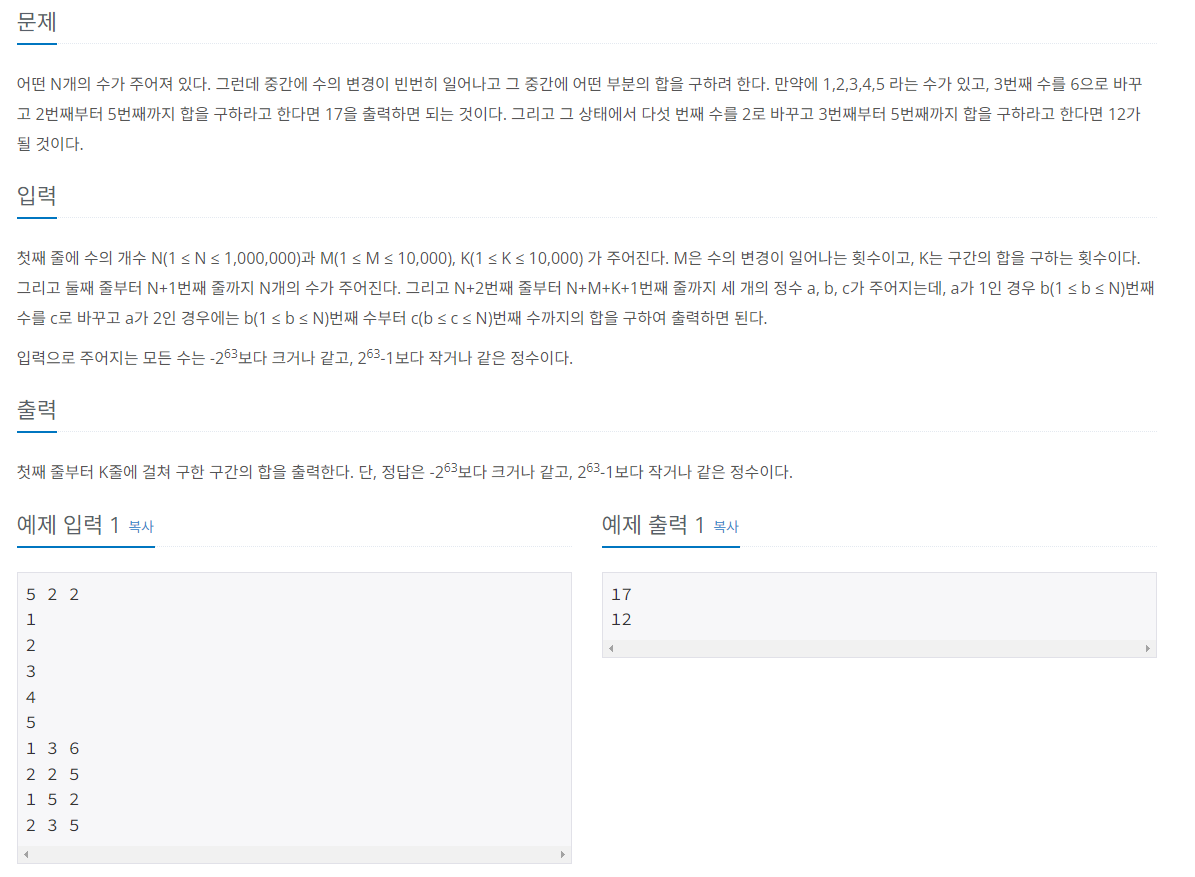

https://www.acmicpc.net/problem/2042

In [1]:
import sys
#input = sys.stdin.readline
 
def init(node, start, end): 
    if start == end :
        tree[node] = l[start]
        return tree[node]
    else :
        tree[node] = init(node*2, start, (start+end)//2) + init(node*2+1, (start+end)//2+1, end)
        return tree[node]
    
def subSum(node, start, end, left, right) :
    if left > end or right < start :
        return 0

    if left <= start and end <= right :
        return tree[node]

    return subSum(node*2, start, (start+end)//2, left, right) + subSum(node*2 + 1, (start+end)//2+1, end, left, right)
 
 
def update(node, start, end, index, diff) :
    if index < start or index > end :
        return
 
    tree[node] += diff
    
    if start != end :
        update(node*2, start, (start+end)//2, index, diff)
        update(node*2+1, (start+end)//2+1, end, index, diff)
 
 
n, m, k = map(int, input().rstrip().split())
 
l = []
tree = [0] * 3000000
 
for _ in range(n) :
    l.append(int(input().rstrip()))
 
init(1, 0, n-1)
 
for _ in range(m+k) :
    a, b, c = map(int, input().rstrip().split())
    if a == 1 :
        b = b-1
        diff = c - l[b]
        l[b] = c
        update(1, 0, n-1, b, diff)
    elif a == 2 :                
        print(subSum(1, 0, n-1 ,b-1, c-1))

5 2 2
1
2
3
4
5
1 3 6
2 2 5
17
1 5 2
2 3 5
12
